In [1]:

# Step 1: Setup Environment
!apt-get install -y poppler-utils
!apt-get install -y tesseract-ocr
!pip install pytesseract
!pip install opencv-python-headless
!pip install pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 1s (186 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
T

In [2]:
import cv2
import pytesseract
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

In [3]:
# Set the path for pytesseract to locate the Tesseract OCR executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'


In [4]:

# Step 2: Upload Images and PDFs
uploaded = files.upload()

Saving Figure.png to Figure.png


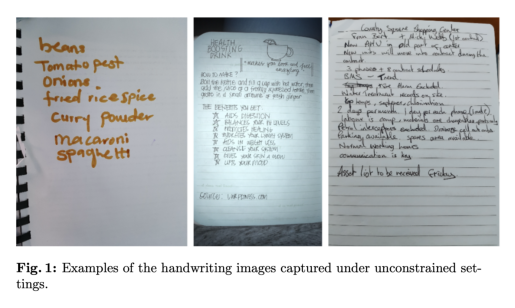

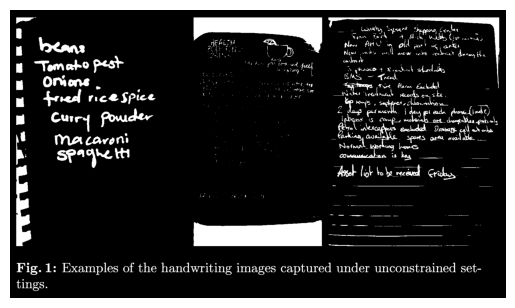

Extracted Text:
,

   

 

a rect Serine we are
Foren: LORE? eet
rt Lon ON Paeantina Roonaan cease L
Oe i
Pa aon a ee Se es
ol ayy ae ee on
a Ries int eee a 7
PO aie ie reno
2 foev.ve ty
| all a ao F , a aK caren an Sn
beiid bition SW ren an ae
‘ Ma caven - . a — fea aes rn er er ee
4 dale \ Aa - Cowuuscal ee er

“Heol lak bole wet Crd

pone!
i
7

|

Fig. 1: Examples of the handwriting images captured under unconstrained set-
ia beteeoe

    



In [5]:
# Step 3: Process Uploaded Files
for filename in uploaded.keys():
    if filename.lower().endswith('.pdf'):
        # Convert PDF to images
        images = convert_from_path(filename)
        for i, img in enumerate(images):
            # Process each page of the PDF
            img_cv = np.array(img)
            plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f'Page {i + 1}')
            plt.show()

             # Preprocess and extract text
            gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
            _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
            plt.imshow(binary, cmap='gray')
            plt.axis('off')
            plt.show()
            text = pytesseract.image_to_string(binary, lang='eng')
            print(f"Extracted Text from Page {i + 1}:")
            print(text)

    elif filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Process image files
        img = Image.open(filename)
        img_cv = np.array(img)

        plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # Preprocess and extract text
        gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
        _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
        plt.imshow(binary, cmap='gray')
        plt.axis('off')
        plt.show()
        text = pytesseract.image_to_string(binary, lang='eng')
        print("Extracted Text:")
        print(text)